In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
import random

In [72]:
train = "../w1/cats_and_dogs/train"
val = "../w1/cats_and_dogs/val"

In [73]:
horse_train = os.path.join(train, "cat")
human_train = os.path.join(train, "dog")

In [74]:
os.listdir(horse_train)[:5]

['Persian_123_jpg.rf.87d8ed5ba94b1f22d92cee480bf0cb46.jpg',
 'Bengal_167_jpg.rf.1542d3551f036a577880f22719c2fd08.jpg',
 'British_Shorthair_187_jpg.rf.24d36402bce6b82092dc93876c65bb71.jpg',
 'Ragdoll_160_jpg.rf.625334e2d1ce3b4e412899793b2da250.jpg',
 'Bengal_145_jpg.rf.3dadbfbb39437890fc249f7edb37cb2f.jpg']

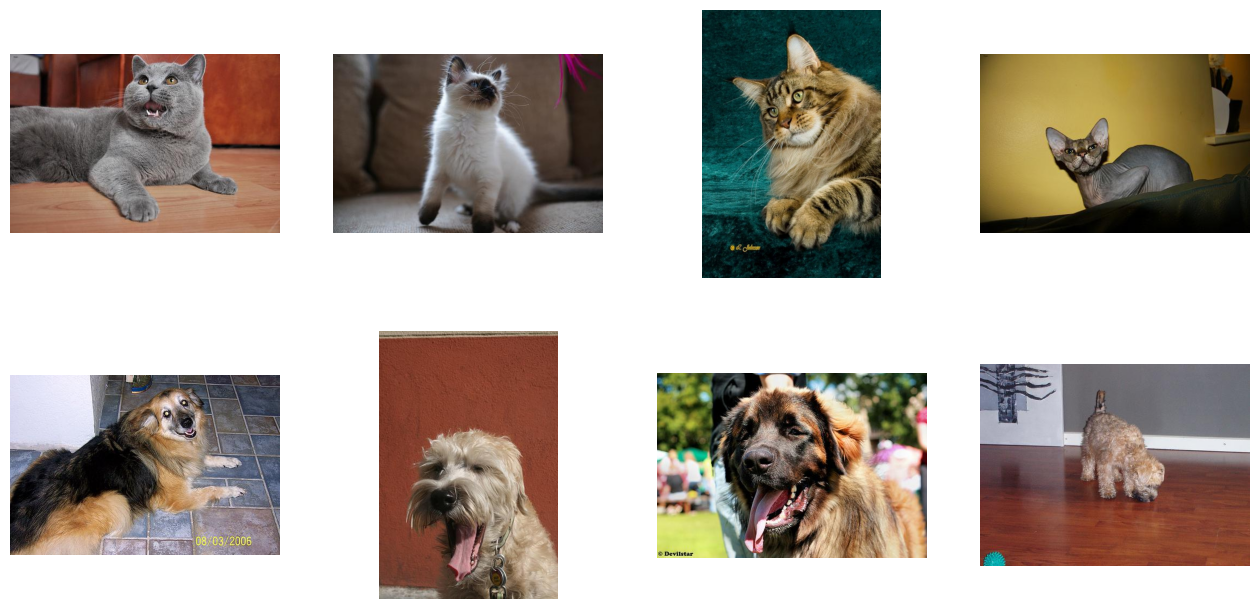

In [75]:
n_rows = 4
n_cols = 4

fig = plt.gcf()
fig.set_size_inches(n_rows * 4, n_cols * 4)

next_cat_images = [
    os.path.join(horse_train, f_name)
    for f_name in random.sample(os.listdir(horse_train), k=4)
]
next_dog_image = [
    os.path.join(human_train, fname)
    for fname in random.sample(os.listdir(human_train), k=4)
]


for i, img_path in enumerate(next_cat_images + next_dog_image):
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis("off")

    img = mpimg.imread(img_path)

    plt.imshow(img)

plt.show()

In [76]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train, image_size=(150, 150), batch_size=30, label_mode="binary"
)


val_dataset = tf.keras.utils.image_dataset_from_directory(
    val, image_size=(150, 150), batch_size=30, label_mode="binary"
)

Found 275 files belonging to 2 classes.


Found 70 files belonging to 2 classes.


In [77]:
SHUFFLE_BUFFER_SIZE = 50
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (
    train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
)

val_dataset_final = val_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [89]:
def create_model():
    """
    Created CNN layer with 4 Convolutional layer
    """
    model = tf.keras.models.Sequential(
        [
            tf.keras.Input(shape=(150, 150, 3)),
            tf.keras.layers.Rescaling(1.0 / 255),
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )

    return model

In [92]:
EPOCHS = 20
model = create_model()


model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)


fit_history = model.fit(
    train_dataset_final, epochs=EPOCHS, validation_data=val_dataset_final, verbose=2
)

Epoch 1/20


10/10 - 4s - 365ms/step - accuracy: 0.5855 - loss: 0.7855 - val_accuracy: 0.6571 - val_loss: 0.6531
Epoch 2/20
10/10 - 3s - 306ms/step - accuracy: 0.6545 - loss: 0.6641 - val_accuracy: 0.6571 - val_loss: 0.6701
Epoch 3/20
10/10 - 3s - 332ms/step - accuracy: 0.6545 - loss: 0.6605 - val_accuracy: 0.6571 - val_loss: 0.6350
Epoch 4/20
10/10 - 3s - 298ms/step - accuracy: 0.6545 - loss: 0.6407 - val_accuracy: 0.6571 - val_loss: 0.6558
Epoch 5/20
10/10 - 3s - 330ms/step - accuracy: 0.6545 - loss: 0.6357 - val_accuracy: 0.6571 - val_loss: 0.6235
Epoch 6/20
10/10 - 4s - 357ms/step - accuracy: 0.6545 - loss: 0.6324 - val_accuracy: 0.6571 - val_loss: 0.6620
Epoch 7/20
10/10 - 3s - 335ms/step - accuracy: 0.6545 - loss: 0.6483 - val_accuracy: 0.6571 - val_loss: 0.6182
Epoch 8/20
10/10 - 3s - 292ms/step - accuracy: 0.6545 - loss: 0.6171 - val_accuracy: 0.6571 - val_loss: 0.6181
Epoch 9/20
10/10 - 3s - 306ms/step - accuracy: 0.6618 - loss: 0.6575 - val_accuracy: 0.6571 - val_loss: 0.6381
Epoch 10/20


In [93]:
def plot_loss_acc(history):
    acc = history.history["accuracy"]
    loss = history.history['loss']
    
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    fig, sub = plt.subplots(1,2, figsize = (12,6))
    
    sub[0].plot(epochs, acc, 'bo', label="Training Accuracy")
    sub[0].plot(epochs, val_acc, 'b', label = "Validation Accuracy")
    sub[0].set_title("Training and Validation Accuracy")
    sub[0].set_xlabel("epochs")
    sub[0].set_ylabel("Accuracy")
    sub[0].legend()

    sub[1].plot(epochs, loss, 'bo', label="Training Loss")
    sub[1].plot(epochs, val_loss, 'b', label = "Validation Loss")
    sub[1].set_title("Training and Validation Loss")
    sub[1].set_xlabel("epochs")
    sub[1].set_ylabel("Loss")
    sub[1].legend()
    
    plt.show()

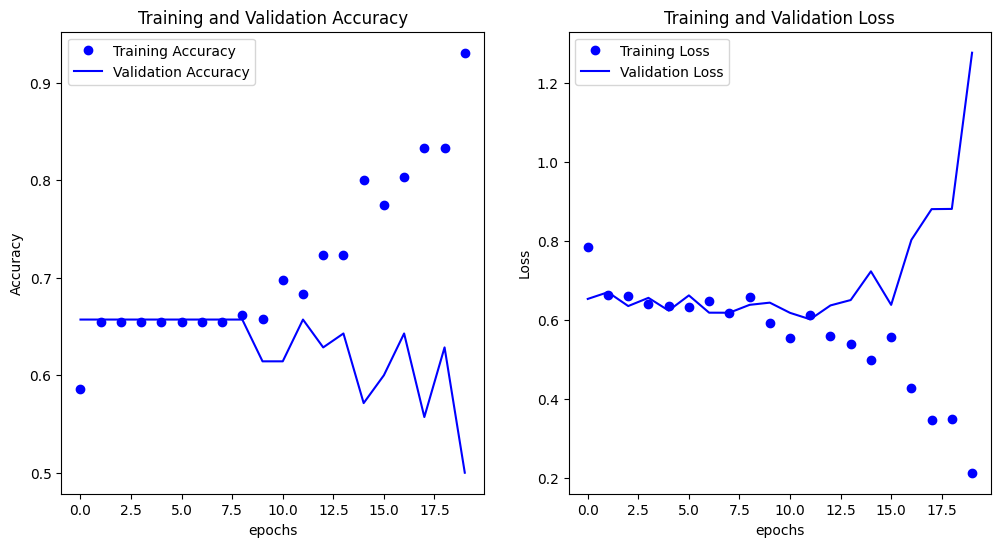

In [94]:
plot_loss_acc(fit_history)

In [95]:
FILL_MODE = "nearest"

data_aug = tf.keras.models.Sequential([
    #specify the image shape
    tf.keras.Input(shape=(150,150,3)),
    
    #add the augmentation layer
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2, fill_mode = FILL_MODE),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode = FILL_MODE),
    tf.keras.layers.RandomZoom(0.2, fill_mode = FILL_MODE)
    
])

In [96]:
def demo_augmentation(sample_image, model, num_aug):
    '''Takes a single image array, then uses a model to generate num_aug transformations'''

    # Instantiate preview list
    image_preview = []

    # Convert input image to a PIL image instance
    sample_image_pil = tf.keras.utils.array_to_img(sample_image)

    # Append the result to the list
    image_preview.append(sample_image_pil)

    # Apply the image augmentation and append the results to the list
    for i in range(num_aug):
        sample_image_aug = model(tf.expand_dims(sample_image, axis=0))
        sample_image_aug_pil = tf.keras.utils.array_to_img(tf.squeeze(sample_image_aug))
        image_preview.append(sample_image_aug_pil)

    # Instantiate a subplot
    fig, axes = plt.subplots(1, num_aug + 1, figsize=(12, 12))

    # Preview the images.
    for index, ax in enumerate(axes):
        ax.imshow(image_preview[index])
        ax.set_axis_off()

        if index == 0:
            ax.set_title('original')
        else:
            ax.set_title(f'augment {index}')

In [97]:

# Get a batch of images
sample_batch = list(train_dataset.take(1))[0][0]
print(f'images per batch: {len(sample_batch)}')

images per batch: 30


2026-02-23 01:35:57.850654: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


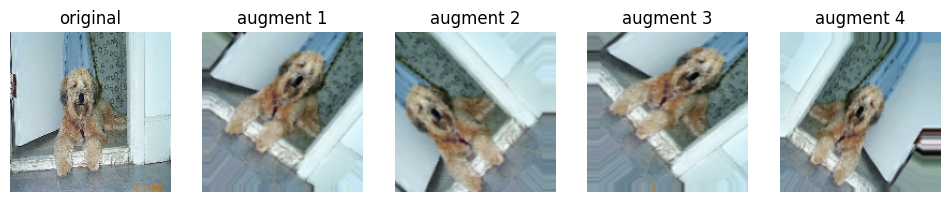

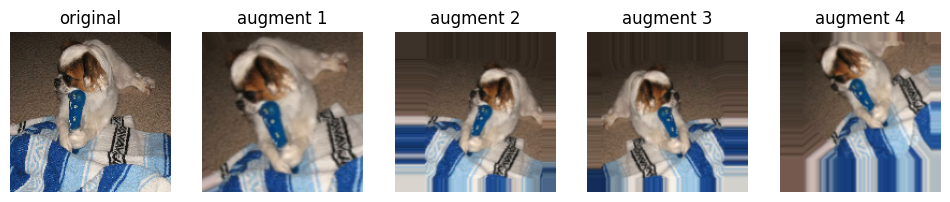

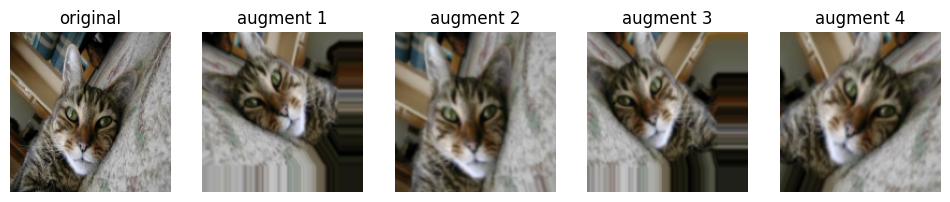

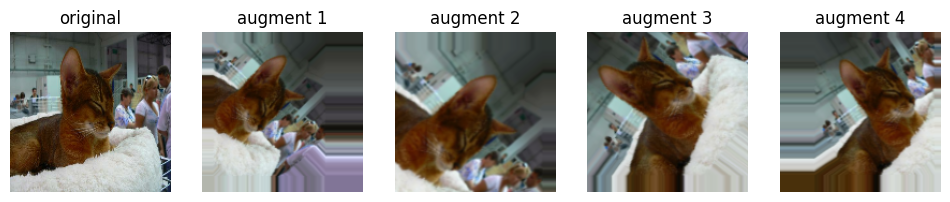

In [98]:
NUM_AUG = 4

# Apply the transformations to the first 4 images
demo_augmentation(sample_batch[0], data_aug, NUM_AUG)
demo_augmentation(sample_batch[1], data_aug, NUM_AUG)
demo_augmentation(sample_batch[2], data_aug, NUM_AUG)
demo_augmentation(sample_batch[3], data_aug, NUM_AUG)

# Uncomment the line below to delete the variable to free up some memory
# del sample_batch

In [99]:
# Instantiate the base model
model_without_aug = create_model()

# Prepend the data augmentation layers to the base model
model_with_aug = tf.keras.models.Sequential([
    data_aug,
    model_without_aug
])

# Compile the model
model_with_aug.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])

In [100]:
EPOCHS=30

# Train the new model
history_with_aug = model_with_aug.fit(
      train_dataset_final,
      epochs=EPOCHS,
      validation_data=val_dataset_final,
      verbose=2)

Epoch 1/30
10/10 - 4s - 428ms/step - accuracy: 0.6255 - loss: 0.6560 - val_accuracy: 0.6571 - val_loss: 0.6351
Epoch 2/30
10/10 - 3s - 344ms/step - accuracy: 0.6545 - loss: 0.6466 - val_accuracy: 0.6571 - val_loss: 0.6340
Epoch 3/30
10/10 - 4s - 362ms/step - accuracy: 0.6545 - loss: 0.6416 - val_accuracy: 0.6571 - val_loss: 0.6303
Epoch 4/30
10/10 - 3s - 322ms/step - accuracy: 0.6545 - loss: 0.6390 - val_accuracy: 0.6571 - val_loss: 0.6268
Epoch 5/30
10/10 - 3s - 346ms/step - accuracy: 0.6545 - loss: 0.6316 - val_accuracy: 0.6571 - val_loss: 0.6235
Epoch 6/30
10/10 - 3s - 323ms/step - accuracy: 0.6545 - loss: 0.6353 - val_accuracy: 0.6571 - val_loss: 0.6214
Epoch 7/30
10/10 - 4s - 386ms/step - accuracy: 0.6545 - loss: 0.6360 - val_accuracy: 0.6571 - val_loss: 0.6203
Epoch 8/30
10/10 - 4s - 362ms/step - accuracy: 0.6545 - loss: 0.6285 - val_accuracy: 0.6571 - val_loss: 0.6187
Epoch 9/30
10/10 - 3s - 325ms/step - accuracy: 0.6545 - loss: 0.6303 - val_accuracy: 0.6571 - val_loss: 0.6171
E

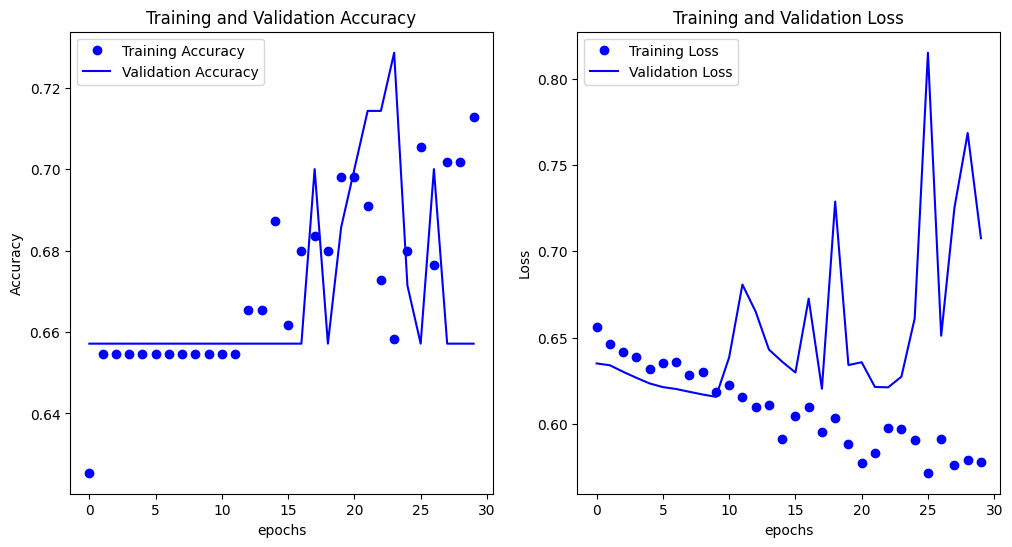

In [101]:
plot_loss_acc(history_with_aug)